In [68]:
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt

In [69]:
houses = pd.read_csv('C:/Users/saidz/OneDrive/Masaüstü/PYTHON/Airbnb_prj/listings.csv')

In [70]:
type(houses)

pandas.core.frame.DataFrame

In [71]:
houses['geometry'] = houses[['longitude', 'latitude']].apply(shp.Point, axis=1)

c:\Users\saidz\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [72]:
houses = gpd.GeoDataFrame(houses)

In [73]:
houses.crs = {'init' : 'epsg:4329'}

c:\Users\saidz\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [74]:
houses.crs

<Geographic 2D CRS: +init=epsg:4329 +type=crs>
Name: WGS 84 (3D)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belgium, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Saint Eustasius and Saba, Bosnia and Herzegovina, Botswana, Bouvet Island, Brazil, British Indian Ocean Territory, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo, Cook Islands, Costa Rica, Côte d'Ivoire (Ivory Coast), Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, Equato

In [75]:
houses.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
0,39971294,Cozy flat with chimney,21565256,Tanja,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.501680,13.415730,Entire home/apt,50,1,2,2019-12-02,0.06,1,0,0,NaN,POINT (13.41573 52.50168)
1,11934470,Bright Studio Apartment / 4th fl/ long term,62819516,Carla & Daniel,Neukölln,Reuterstraße,52.492260,13.429370,Entire home/apt,43,30,5,2022-03-29,0.07,2,271,3,NaN,POINT (13.42937 52.49226)
2,17580693,"Gemütliches, Zentrales Zimmer mit Blick ins Grüne",119416956,Sven,Mitte,Parkviertel,52.561510,13.355150,Private room,42,2,31,2022-03-07,0.50,1,10,4,NaN,POINT (13.35515 52.56151)
3,579471587567149993,Süßes Altbau-Apartment in Schöneberg,9916942,Kirsten,Tempelhof - Schöneberg,Friedenau,52.477266,13.336424,Entire home/apt,52,92,0,NaN,NaN,1,362,0,NaN,POINT (13.33642 52.47727)
4,17497917,BERLIN MITTE - hotspot - central & calm,5937313,Hyun-Jung,Mitte,Alexanderplatz,52.524380,13.410120,Entire home/apt,106,2,116,2022-05-29,1.84,1,6,25,NaN,POINT (13.41012 52.52438)


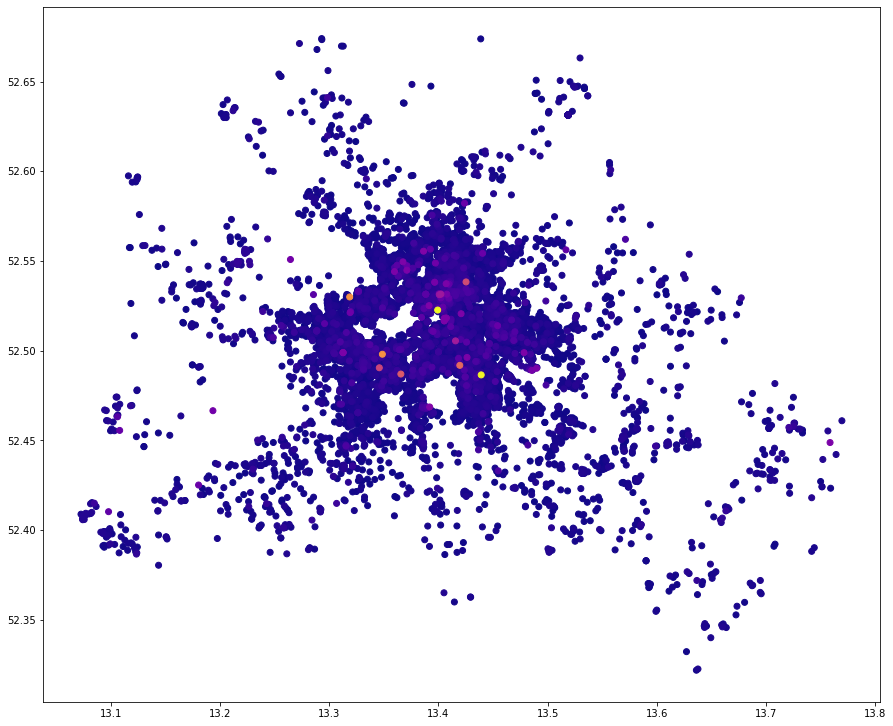

In [76]:
houses.sort_values('price').plot('price', cmap= 'plasma', figsize=(15,15));

In [77]:
berlin_city = gpd.read_file(r'C:\Users\saidz\OneDrive\Masaüstü\PYTHON\Airbnb_prj\neighbourhoods.geojson')

In [78]:
berlin_city.head(5)

,neighbourhood,neighbourhood_group,geometry
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52..."
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52..."
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52..."
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52..."
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52..."


In [79]:
houses2 = houses.dropna(subset=['name'])

In [80]:
houses2.loc[houses2['name'].str.contains('Zentrales ')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
2,17580693,"Gemütliches, Zentrales Zimmer mit Blick ins Grüne",119416956,Sven,Mitte,Parkviertel,52.56151,13.35515,Private room,42,2,31,2022-03-07,0.50,1,10,4,NaN,POINT (13.35515 52.56151)
31,6802037,Zentrales Zimmer in Berlin,4863332,Amira,Mitte,Moabit West,52.53265,13.34332,Private room,47,7,1,2016-04-13,0.01,1,0,0,NaN,POINT (13.34332 52.53265)
171,47211361,Zentrales Studio in Berlin Friedrichshain,23341681,Gundula,Friedrichshain-Kreuzberg,Karl-Marx-Allee-Süd,52.51389,13.45050,Entire home/apt,60,3,39,2022-05-28,2.25,1,45,33,02/Z/AZ/012403-20,POINT (13.45050 52.51389)
4165,22589706,Zentrales hübsches Zimmer,26204012,Sonja,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51048,13.45265,Private room,43,1,264,2022-05-29,4.94,2,29,64,02/Z/AZ/014174-21,POINT (13.45265 52.51048)
5584,18815722,Zentrales Apartment Berlin,92236508,Lulu,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50107,13.43152,Entire home/apt,47,4,13,2017-11-27,0.21,1,0,0,NaN,POINT (13.43152 52.50107)
5636,23314858,Zentrales Family-Apartment in Berlin,8912086,René,Charlottenburg-Wilm.,Volkspark Wilmersdorf,52.48686,13.32802,Entire home/apt,75,60,1,2020-04-22,0.04,37,10,0,NaN,POINT (13.32802 52.48686)
7604,25779439,Zentrales Zimmer am Volkspark Friedrichshain,19527112,Jens,Friedrichshain-Kreuzberg,Frankfurter Allee Nord,52.52486,13.45087,Private room,69,2,4,2022-05-08,0.08,2,0,1,02/Z/RA/014326-21,POINT (13.45087 52.52486)
8179,30728734,"Zentrales Cityappartent mit WLan, Balkon und Lift",230001236,Assunta,Mitte,Moabit West,52.52542,13.32783,Entire home/apt,90,3,47,2021-08-15,1.14,1,0,3,01/Z/ZA/006545-17,POINT (13.32783 52.52542)
8255,27536996,Zentrales Zimmer für 2 Personen Nähe Mauerpark,33432331,Daniel,Mitte,Brunnenstr. Nord,52.54205,13.39163,Private room,60,5,4,2018-10-08,0.09,1,0,0,NaN,POINT (13.39163 52.54205)
10914,23167598,Zentrales Apartment nähe Ostkreuz,17434221,Bernhard,Lichtenberg,Neu Lichtenberg,52.50335,13.48255,Entire home/apt,51,2,182,2022-05-29,3.98,1,255,62,11/Z/AZ/002435-22,POINT (13.48255 52.50335)


<AxesSubplot:>

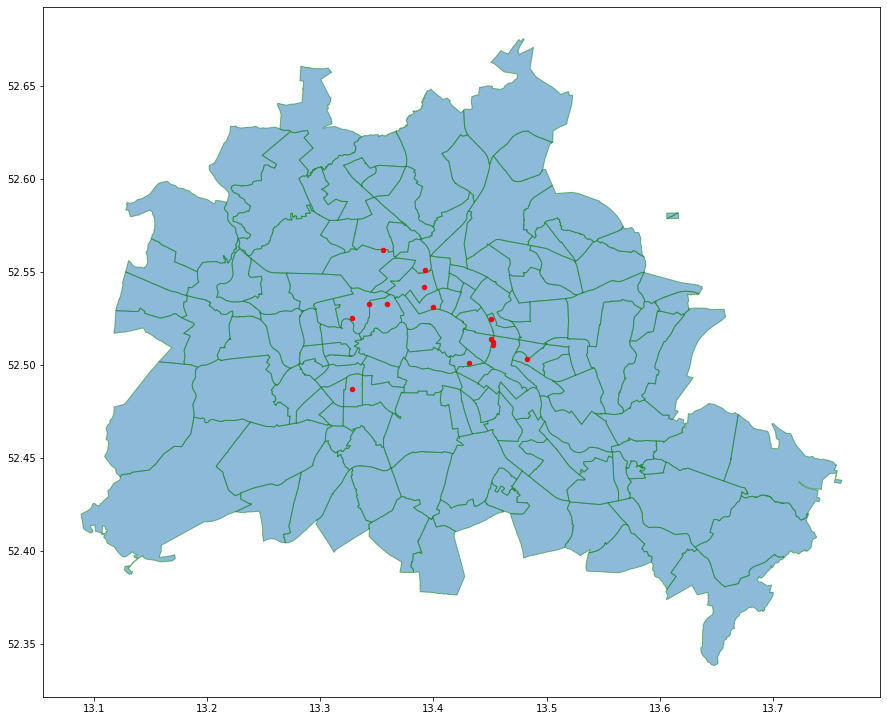

In [81]:
ax = berlin_city.plot(figsize=(15,15), alpha=0.5, edgecolor= 'green')
houses2.loc[houses2['name'].str.contains('Zentrales')].plot(ax=ax, color= 'red',marker = 'o',  markersize= 20)

In [82]:
houses2.loc[houses2['name'].str.contains('Balkon' and 'Zentrales')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
2,17580693,"Gemütliches, Zentrales Zimmer mit Blick ins Grüne",119416956,Sven,Mitte,Parkviertel,52.56151,13.35515,Private room,42,2,31,2022-03-07,0.50,1,10,4,NaN,POINT (13.35515 52.56151)
31,6802037,Zentrales Zimmer in Berlin,4863332,Amira,Mitte,Moabit West,52.53265,13.34332,Private room,47,7,1,2016-04-13,0.01,1,0,0,NaN,POINT (13.34332 52.53265)
171,47211361,Zentrales Studio in Berlin Friedrichshain,23341681,Gundula,Friedrichshain-Kreuzberg,Karl-Marx-Allee-Süd,52.51389,13.45050,Entire home/apt,60,3,39,2022-05-28,2.25,1,45,33,02/Z/AZ/012403-20,POINT (13.45050 52.51389)
1477,11170613,"Zentrales, helles Zimmer",58127486,Edyta,Mitte,Osloer Straße,52.55087,13.39268,Private room,25,1,32,2016-07-17,0.42,1,0,0,NaN,POINT (13.39268 52.55087)
4165,22589706,Zentrales hübsches Zimmer,26204012,Sonja,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51048,13.45265,Private room,43,1,264,2022-05-29,4.94,2,29,64,02/Z/AZ/014174-21,POINT (13.45265 52.51048)
5584,18815722,Zentrales Apartment Berlin,92236508,Lulu,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50107,13.43152,Entire home/apt,47,4,13,2017-11-27,0.21,1,0,0,NaN,POINT (13.43152 52.50107)
5636,23314858,Zentrales Family-Apartment in Berlin,8912086,René,Charlottenburg-Wilm.,Volkspark Wilmersdorf,52.48686,13.32802,Entire home/apt,75,60,1,2020-04-22,0.04,37,10,0,NaN,POINT (13.32802 52.48686)
7604,25779439,Zentrales Zimmer am Volkspark Friedrichshain,19527112,Jens,Friedrichshain-Kreuzberg,Frankfurter Allee Nord,52.52486,13.45087,Private room,69,2,4,2022-05-08,0.08,2,0,1,02/Z/RA/014326-21,POINT (13.45087 52.52486)
8179,30728734,"Zentrales Cityappartent mit WLan, Balkon und Lift",230001236,Assunta,Mitte,Moabit West,52.52542,13.32783,Entire home/apt,90,3,47,2021-08-15,1.14,1,0,3,01/Z/ZA/006545-17,POINT (13.32783 52.52542)
8255,27536996,Zentrales Zimmer für 2 Personen Nähe Mauerpark,33432331,Daniel,Mitte,Brunnenstr. Nord,52.54205,13.39163,Private room,60,5,4,2018-10-08,0.09,1,0,0,NaN,POINT (13.39163 52.54205)


<AxesSubplot:>

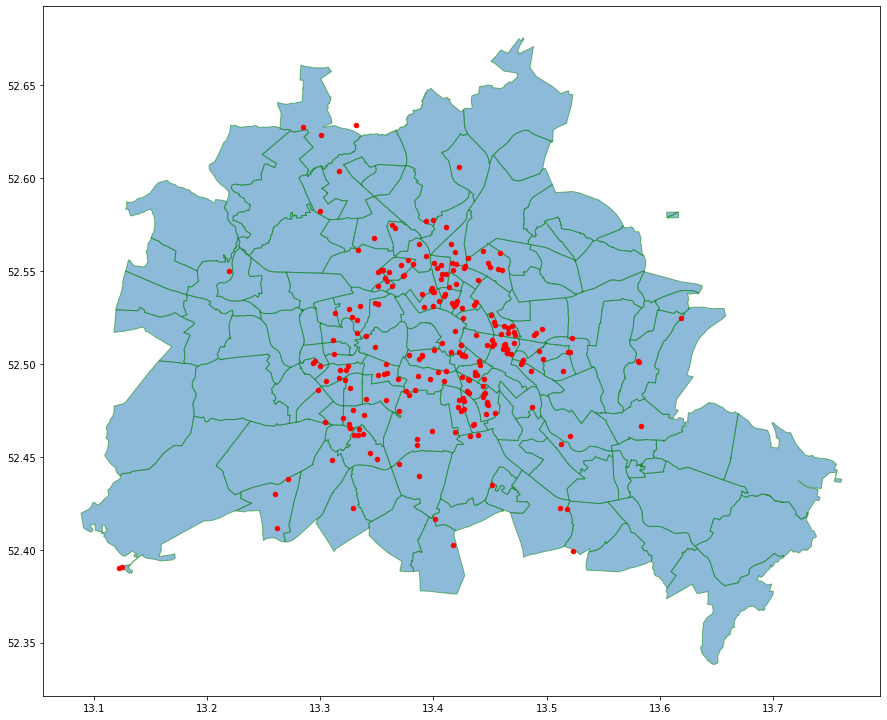

In [83]:
ax = berlin_city.plot(figsize=(15,15), alpha=0.5, edgecolor= 'green')
houses2.loc[houses2['name'].str.contains('Balkon')].plot(ax=ax, color= 'red',marker = 'o',  markersize= 20)

In [84]:
unified = gpd.sjoin(houses2, berlin_city, op='within', how='left')
unified.head()

c:\Users\saidz\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\saidz\AppData\Local\Temp\ipykernel_7456\1156267375.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4329 +type=crs
Right CRS: EPSG:4326

  unified = gpd.sjoin(houses2, berlin_city, op='within', how='left')


,id,name,host_id,host_name,neighbourhood_group_left,neighbourhood_left,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry,index_right,neighbourhood_right,neighbourhood_group_right
0,39971294,Cozy flat with chimney,21565256,Tanja,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.501680,13.415730,Entire home/apt,50,...,2019-12-02,0.06,1,0,0,NaN,POINT (13.41573 52.50168),13.0,nördliche Luisenstadt,Friedrichshain-Kreuzberg
1,11934470,Bright Studio Apartment / 4th fl/ long term,62819516,Carla & Daniel,Neukölln,Reuterstraße,52.492260,13.429370,Entire home/apt,43,...,2022-03-29,0.07,2,271,3,NaN,POINT (13.42937 52.49226),78.0,Reuterstraße,Neukölln
2,17580693,"Gemütliches, Zentrales Zimmer mit Blick ins Grüne",119416956,Sven,Mitte,Parkviertel,52.561510,13.355150,Private room,42,...,2022-03-07,0.50,1,10,4,NaN,POINT (13.35515 52.56151),21.0,Parkviertel,Mitte
3,579471587567149993,Süßes Altbau-Apartment in Schöneberg,9916942,Kirsten,Tempelhof - Schöneberg,Friedenau,52.477266,13.336424,Entire home/apt,52,...,NaN,NaN,1,362,0,NaN,POINT (13.33642 52.47727),61.0,Friedenau,Tempelhof - Schöneberg
4,17497917,BERLIN MITTE - hotspot - central & calm,5937313,Hyun-Jung,Mitte,Alexanderplatz,52.524380,13.410120,Entire home/apt,106,...,2022-05-29,1.84,1,6,25,NaN,POINT (13.41012 52.52438),17.0,Alexanderplatz,Mitte


In [85]:
price_average = unified.groupby('neighbourhood_right').mean().sort_values('price', ascending=False).price
price_average

neighbourhood_right
Marzahn-Nord           500.000000
Haselhorst             191.000000
Charlottenburg Nord    160.600000
Rummelsburger Bucht    152.000000
Spandau Mitte          136.695652
                          ...    
West 4                  37.571429
Marzahn-Mitte           36.750000
Forst Grunewald         35.000000
Hellersdorf-Süd         25.000000
Hellersdorf-Ost         23.000000
Name: price, Length: 138, dtype: float64

In [86]:
unified['sum'] = 1


In [87]:
c_sum = unified.groupby('neighbourhood_right').count()['sum'] 
c_sum

neighbourhood_right
Adlershof                 32
Albrechtstr.              74
Alexanderplatz           915
Allende-Viertel            3
Alt  Treptow             110
                        ... 
Wilhelmstadt              35
Zehlendorf  Nord          60
Zehlendorf  Südwest       41
nördliche Luisenstadt    297
südliche Luisenstadt     460
Name: sum, Length: 138, dtype: int64

<AxesSubplot:xlabel='neighbourhood_right'>

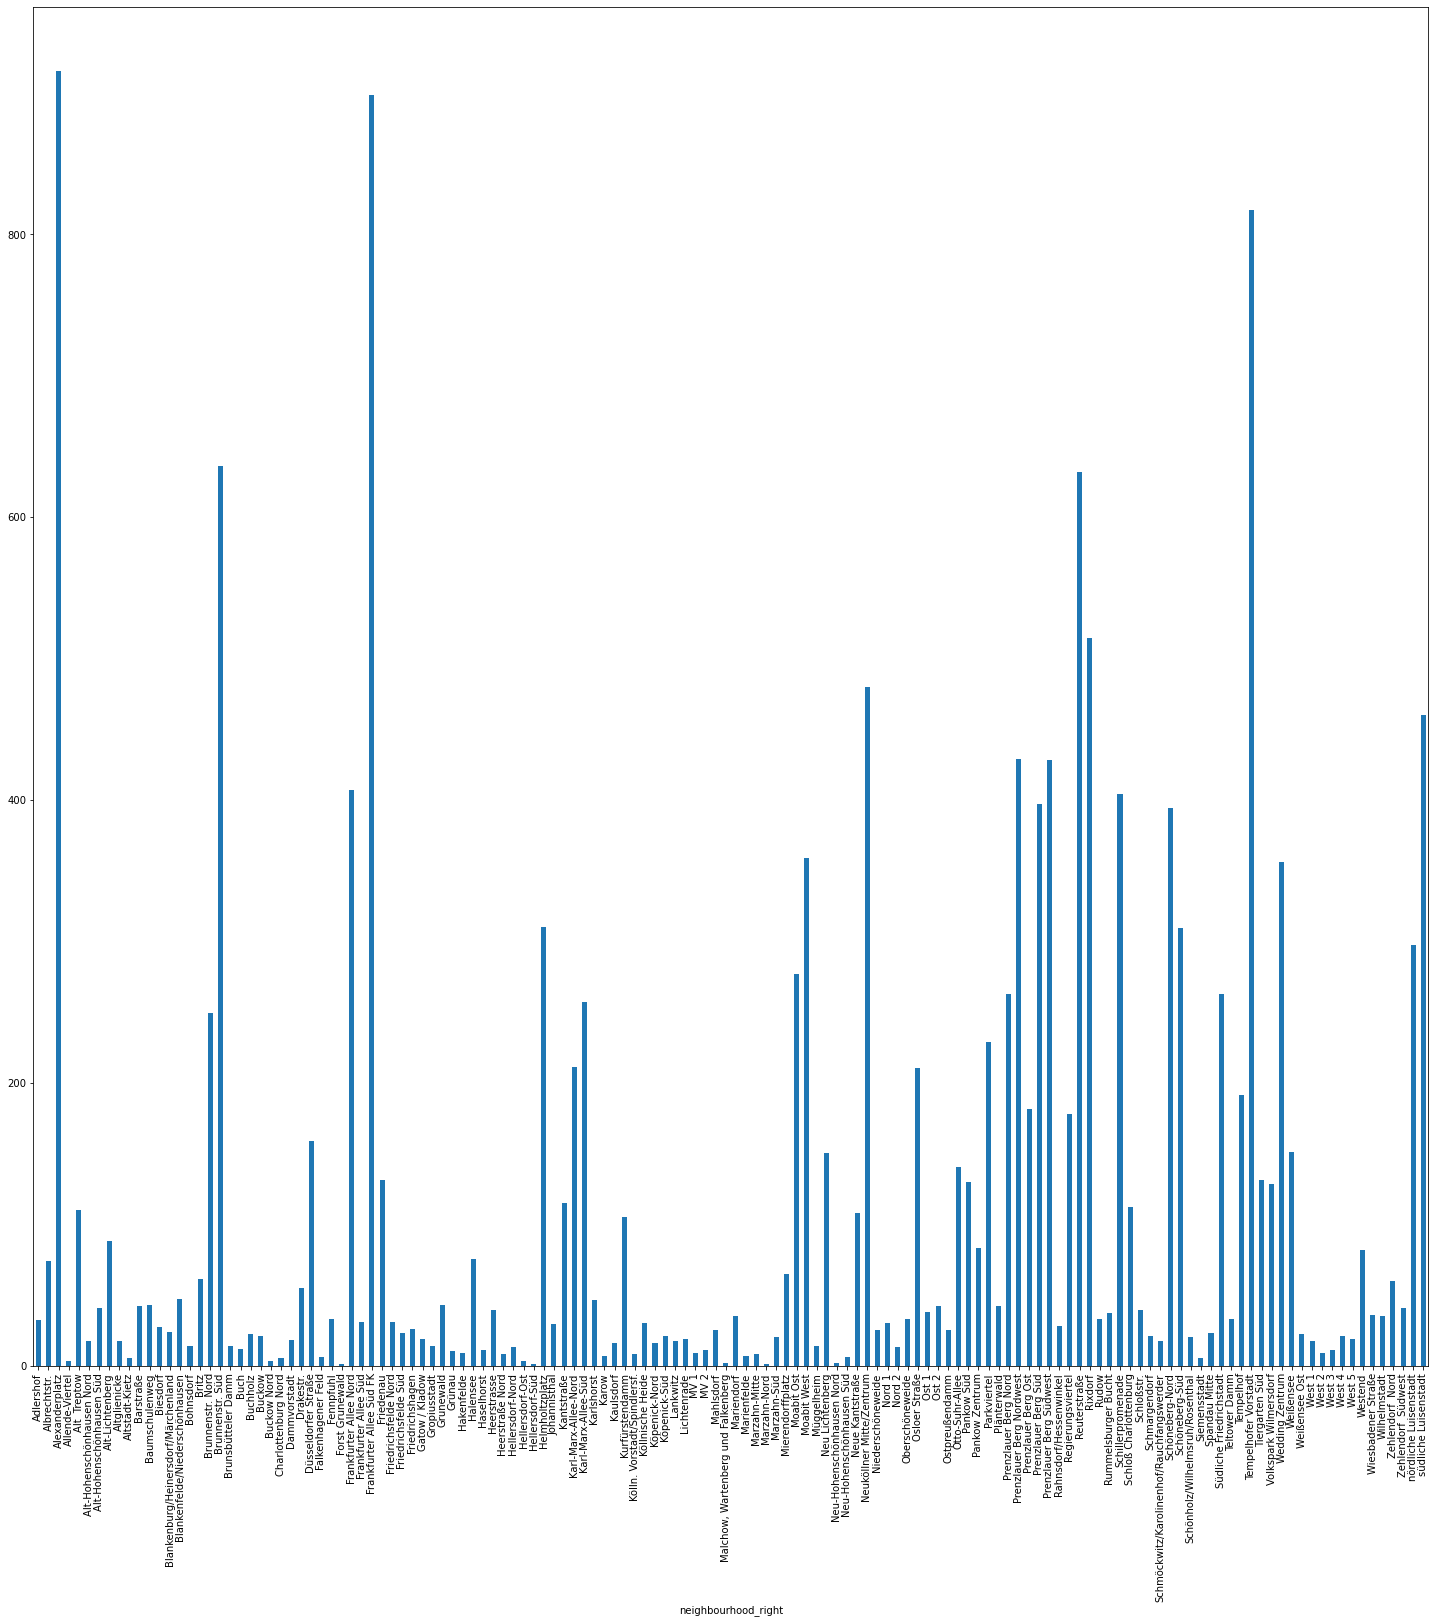

In [88]:
c_sum.plot(kind='bar', figsize=(25,25))

In [89]:
type(c_sum)

pandas.core.series.Series

In [90]:
c_sum = c_sum.to_frame()

In [91]:
city_uni = berlin_city.merge(price_average, left_on='neighbourhood', right_on='neighbourhood_right')

In [92]:
city_uni

,neighbourhood,neighbourhood_group,geometry,price
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...",88.042553
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...",84.496774
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...",100.638889
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...",83.176471
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...",128.428571
...,...,...,...,...
133,Hellersdorf-Ost,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.62135 52.52704, 13.62079 52...",23.000000
134,Mahlsdorf,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.65554 52.52982, 13.65693 52...",66.480000
135,Ost 1,Reinickendorf,"MULTIPOLYGON (((13.36666 52.55823, 13.36561 52...",46.447368
136,Ost 2,Reinickendorf,"MULTIPOLYGON (((13.36418 52.56298, 13.36423 52...",56.690476


In [93]:
city_uni2 = berlin_city.merge(c_sum, left_on='neighbourhood', right_on='neighbourhood_right')
city_uni2

,neighbourhood,neighbourhood_group,geometry,sum
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...",47
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...",310
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...",36
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...",17
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...",14
...,...,...,...,...
133,Hellersdorf-Ost,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.62135 52.52704, 13.62079 52...",3
134,Mahlsdorf,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.65554 52.52982, 13.65693 52...",25
135,Ost 1,Reinickendorf,"MULTIPOLYGON (((13.36666 52.55823, 13.36561 52...",38
136,Ost 2,Reinickendorf,"MULTIPOLYGON (((13.36418 52.56298, 13.36423 52...",42


Text(0.5, 1.0, 'Average daily airbnb rental rates calculated by county')

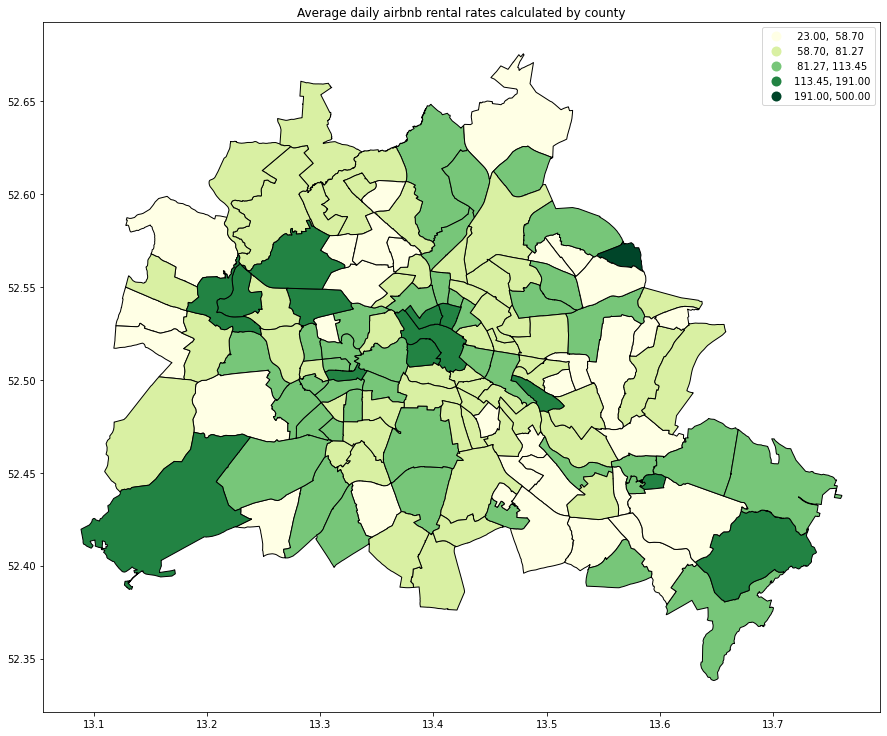

In [94]:
ax = city_uni.plot(figsize=(15,15), column='price', scheme='fisherjenks', k=5, legend=True, cmap='YlGn', edgecolor='black')
ax.set_title('Average daily airbnb rental rates calculated by county')

In [95]:
price_aff = city_uni[city_uni['price'] < 70]

<AxesSubplot:>

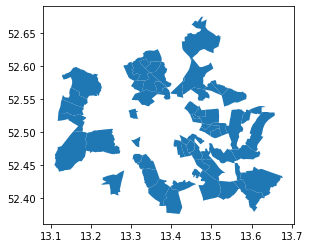

In [96]:
price_aff.plot()